In [1]:
# Импорт необходимых библиотек
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, r2_score, mean_squared_error
from sklearn import tree

# Установка random seed для воспроизводимости
RANDOM_SEED = 42

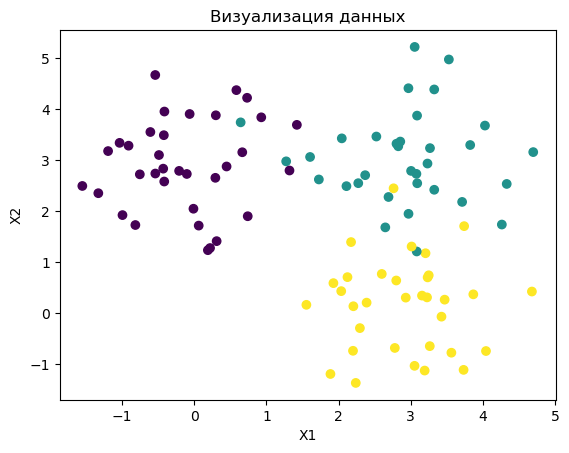

In [3]:
# Генерация данных для классификации
X, y = make_blobs(n_samples=100, centers=[(0,3),(3,3),(3,0)], 
                  n_features=2, random_state=RANDOM_SEED,
                  cluster_std=(0.9,0.9,0.9))

# Визуализация данных
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Визуализация данных')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [5]:
# Обучение модели дерева решений для классификации
depth = 4
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=depth, 
                                random_state=RANDOM_SEED)
clf_tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

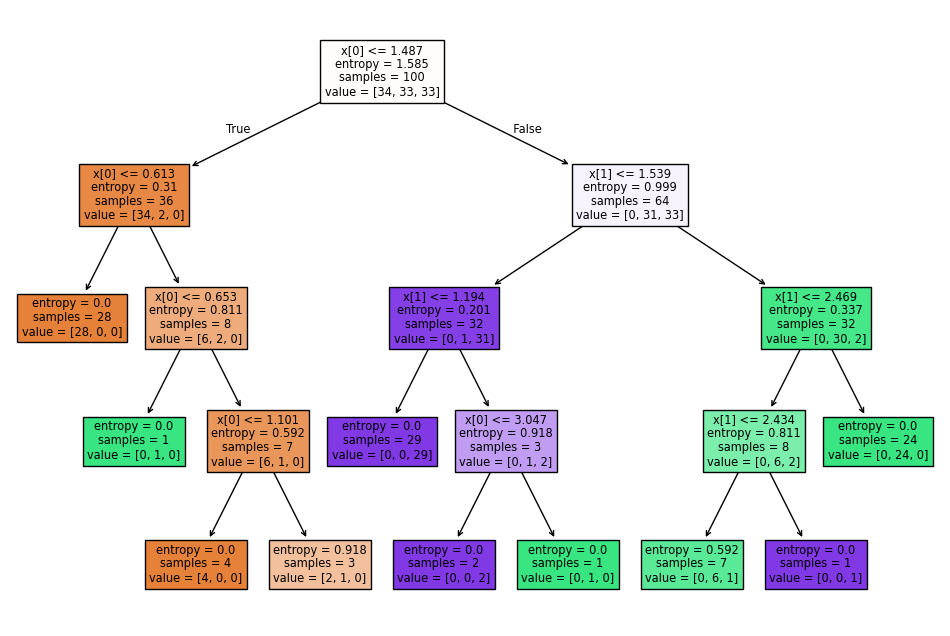

In [7]:
# Визуализация дерева решений
plt.figure(figsize=(12, 8))
plot_tree(clf_tree, filled=True)
plt.show()

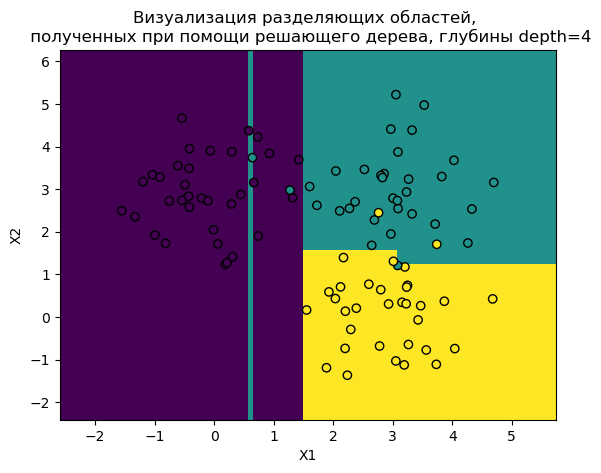

In [9]:
# Визуализация разделяющих областей
X0 = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf_tree.predict(np.c_[X0_grid.ravel(), X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='black', linewidth=1)

plt.title('Визуализация разделяющих областей, \n полученных при помощи решающего дерева, глубины depth={}'.format(depth))
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [11]:
# Оценка качества модели
y_pred = clf_tree.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy =', accuracy_score(y, y_pred))
print('F1_score =', f1_score(y, y_pred, average='micro'))

[[34  0  0]
 [ 1 32  0]
 [ 0  1 32]]
Accuracy = 0.98
F1_score = 0.98


In [13]:
# Создание нового наблюдения и предсказание
observation_new = [[2, 1]]
print("Предсказание для нового наблюдения:", clf_tree.predict(observation_new))

Предсказание для нового наблюдения: [2]


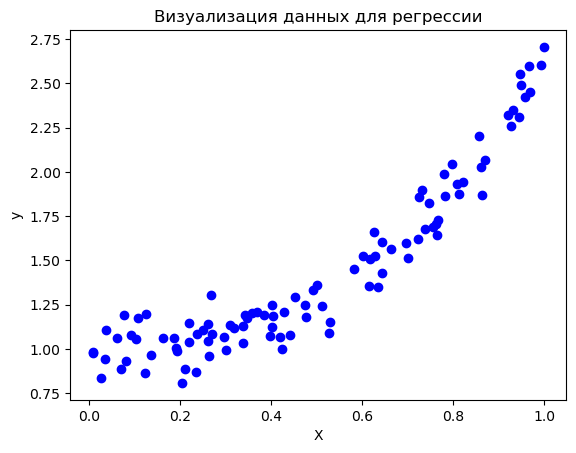

In [15]:
# Генерация данных для регрессии
n_samples = 100
X = np.sort(np.random.rand(n_samples))
y = np.exp(X ** 2) + np.random.normal(0.0, 0.1, X.shape[0])

# Визуализация данных
plt.scatter(X, y, c="b")
plt.title('Визуализация данных для регрессии')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [17]:
# Обучение модели дерева решений для регрессии
depth = 3
reg_tree = DecisionTreeRegressor(max_depth=depth, random_state=RANDOM_SEED)
reg_tree.fit(X.reshape(-1, 1), y)

DecisionTreeRegressor(max_depth=3, random_state=42)

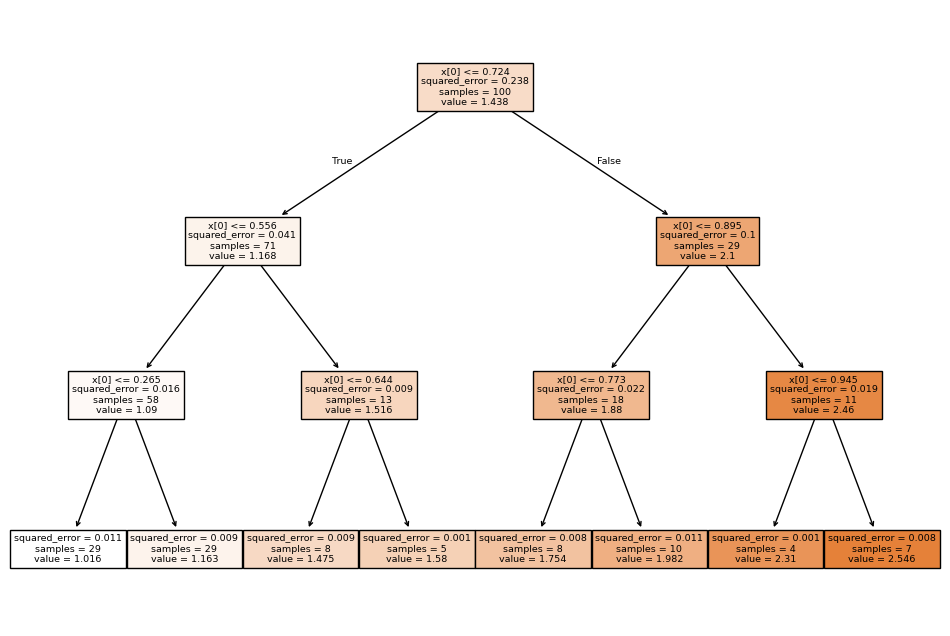

In [19]:
# Визуализация дерева решений
plt.figure(figsize=(12, 8))
plot_tree(reg_tree, filled=True)
plt.show()

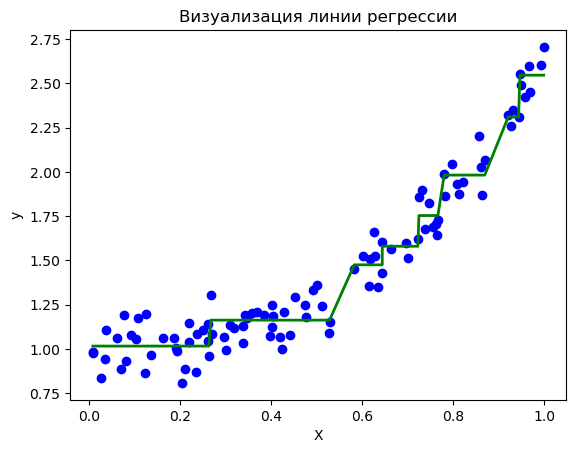

In [21]:
# Визуализация линии регрессии
y_pred_reg = reg_tree.predict(X.reshape(-1, 1))

plt.scatter(X, y, c="b")
plt.plot(X, y_pred_reg, "g", lw=2)
plt.title('Визуализация линии регрессии')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [23]:
# Оценка качества модели
print('r2= ', r2_score(y, y_pred_reg))
print('MSE= ', mean_squared_error(y, y_pred_reg))

r2=  0.9622081890580604
MSE=  0.008977362708100267


In [25]:
# Создание нового наблюдения и предсказание
observation_new = [[0.7]]
print("Предсказание для нового наблюдения:", reg_tree.predict(observation_new))

Предсказание для нового наблюдения: [1.58016332]
